In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk05_advanced.ipynb")

In [2]:
!pip install --upgrade networkx
!pip install --upgrade nbconvert

  Using cached networkx-3.4.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.imagesource {
    font-size: xx-small;
}
</style>
""")

from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

import os
import networkx as nx

from IPython.core.display import HTML
def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()

## Advanced Complete Network Data

You have had practice working with network data that includes node attributes, and exploring mathematical models for quantifying these networks in Lab 3 and Lab 4. This homework builds on your previous experience to work with complete network data.

As you may remember, the Add Health dataset we have been working with stores information about network connections in an edge list. The Add Health dataset also has information about the nodes; it has their grade, their gender, and their race/ethnicity.


# Question 1: 
Load the functions that allow you to read in the Add Health dataset.

_Hint: review the code in Lab 3_

In [4]:
data_path = "data/"

def read_add_health_edges(network_id, path=data_path):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join(path, "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())


def read_add_health_attributes_oneperrow(network_id, net, path=data_path):
    """
    Read in an Add Health attributes file that has one attribute per row
    """
    att_file = os.path.join(path, "comm" + str(network_id) + "_att.dat")
    with open(att_file, 'r') as f:
        att_lines = f.readlines()
    
    # the first 8 lines are meta-info and not actual data
    att_lines = att_lines[8:]
    
    node_races = {}
    node_grades = {}
    node_sexes = {}

    for cur_id in net.nodes():
        
        print("starting node ", cur_id)
        
        # the attributes are stored one per line for each node in sequence (race / sex / grade)
        # so line 0 is node 1's race, line 2 is node 1's sex, line 3 is node 1's grade, line 4 is node 2's race, etc
        start_idx = (cur_id-1) * 3
        this_race = str.split(g_att[start_idx])[2]
        this_sex = str.split(g_att[start_idx+1])[2]
        this_grade = str.split(g_att[start_idx+2])[2]
    
        node_races[cur_id] = this_race
        node_grades[cur_id] = this_grade
        node_sexes[cur_id] = this_sex
    
    nx.set_node_attributes(net, 'race', node_races)
    nx.set_node_attributes(net, 'grade', node_grades)
    nx.set_node_attributes(net, 'sex', node_sexes)
    
    return(net)


def read_add_health_attributes(network_id, net, path=data_path):
    """
    Read in an Add Health attributes file that has one row per node
    """
    
    # open up the attributes datafile
    att_file = os.path.join(path, "comm" + str(network_id) + "_att.dat")
    with open(att_file, 'r') as f:
        att_lines = f.readlines()
        
    # the first several lines are meta-info and not actual data;
    # the data start once we see "DATA:\n"
    header_start = att_lines.index("COLUMN LABELS:\n") + 1
    header_end = att_lines.index("DATA:\n")
    data_start = header_end + 1
    
    # build up a list that maps column index to column name
    col_defs = []
    # build up a dict that has the data for each variable
    col_data = {}
    
    for colindex, lineidx in enumerate(range(header_start, header_end)):
        # strip off the newline and the starting/ending quotes of the column name
        this_name = (str.strip(att_lines[lineidx])[1:-1]).lower()
        col_defs.append(this_name)
        # initialize the data for this column to empty dict
        col_data[this_name] = {}  
    
    att_lines = att_lines[data_start:]
    
    # for each row (corresponding to one node's data)
    # split the columns up and stick them into the appropriate
    # dict, with node id as key and attribute value as value
    for cur_id in net.nodes():
        #print('starting node ', cur_id)
        these_data = str.split(att_lines[cur_id - 1])
        
        for colidx, dat in enumerate(these_data):
            col_data[col_defs[colidx]][cur_id] = dat

    # take the data and assign it to the nodes in the graph object
    for var in col_defs:
        nx.set_node_attributes(net,  col_data[var],var)
    
    return(net)


def read_add_health_network(network_id):
    
    this_net = read_add_health_edges(network_id)
    #this_net = read_add_health_attributes(network_id, this_net)
    this_net = read_add_health_attributes(network_id, this_net)
    
    return(this_net)

In [5]:
grader.check("q1")

q1 results: All test cases passed!

# Question 2:

Use the read_add_health_network function to load the datasets into memory. Remember to omit networks 1 and 48.

_Hint: again, review the code in Lab 3_

In [6]:
add_health_ids = [x for x in range(2, 85) if x != 48]
add_health_networks = [read_add_health_network(x) for x in add_health_ids]

In [7]:
grader.check("q2")

q2 results: All test cases passed!

# Question 3:

Fill in the definition of a helper function to calculate the average degree of the given network.

_Hint: remember that the average degree is 2 times the number of edges, divided by the number of nodes_

In [8]:

def average_degree(net):
    ## Helper function to calculate the average degree of a network
    
    ##Parameters
    ##----------
    ##net : nx.Graph
    ##    - The graph to calculate average degree
        
    ##Return
    ##------
    ##float
    ##    - Average degree of the network
    
    
    return((nx.number_of_edges(net)*2)/nx.number_of_nodes(net))

avg_d=average_degree(add_health_networks[0])
avg_d

6.647619047619048

In [9]:
grader.check("q3")

q3 results: All test cases passed!

# Question 4

Write a loop that goes through each of the 84 Add Health networks and calculates the clustering coefficient and the number of nodes in the network. *(Please use the average clustering coefficient, implemented by the `average_clustering` function from the networkx package.)*

Store the results in a Table called `add_health_clustering` using columns called `num_nodes` and `avg_clustering_coef`.


In [10]:
clustering = make_array()
num_nodes = make_array()

for g in add_health_networks:
    clustering = np.append(clustering, nx.average_clustering(g))
    num_nodes = np.append(num_nodes, nx.number_of_nodes(g))

add_health_clustering = Table().with_columns(['num_nodes', num_nodes,
                                              'avg_clustering_coef', clustering])
add_health_clustering

num_nodes,avg_clustering_coef
105,0.327214
32,0.430558
281,0.221537
157,0.294993
108,0.327537
441,0.218287
204,0.272334
248,0.313195
678,0.23361
411,0.195184


In [11]:
grader.check("q4")

q4 results: All test cases passed!

##  Average path length of biggest component

Remember that it really only makes sense to think about the average path length between two nodes that are in the same component. (Nodes in different components have no path between them.) Since some of the Add Health networks have more than one component, we'll start by picking out only the largest component in each network.

In [12]:
# This might take a few seconds...
def get_biggest_component(network):
    """ Returns the largest connected component of a network
    
    Parameters
    ----------
    network : nx.Graph
        - A single networkx graph
    Returns
    -------
    nx.Graph
        - The largest component of the input network
    """
    components = [network.subgraph(c) for c in nx.connected_components(network)]
    biggest = max(components, key=len)
    return(biggest)

add_health_biggest_components = [get_biggest_component(g) for g in add_health_networks]

# Question 5:

The following code includes a loop that goes through the object created above (the largest component of each of the 84 Add Health networks) and calculates the average shortest path length and the number of nodes in the network. **This may take 3-5 minutes to run.**

Store the results in a Table called `add_health_sp` using columns called `num_nodes`, `avg_shortest_path`, and `avg_degree`.


In [13]:
## NOTE: your code might take a little while
##       (~3-5 minutes) to run

avg_shortest_path = make_array()
num_nodes = make_array()
avg_degree = make_array()

for c in add_health_biggest_components:
    avg_shortest_path = np.append(avg_shortest_path, nx.average_shortest_path_length(c))
    num_nodes = np.append(num_nodes, c.number_of_nodes())
    avg_degree = np.append(avg_degree, average_degree(c))


add_health_sp = Table().with_columns('num_nodes', num_nodes, 'avg_shortest_path', avg_shortest_path, 'avg_degree', avg_degree)
add_health_sp

num_nodes,avg_shortest_path,avg_degree
103,3.19417,6.75728
32,2.38508,5.6875
281,3.36398,8.08541
157,2.84828,9.29936
108,3.02648,7
437,3.86129,7.77117
204,3.36965,7.93137
248,3.43268,8.09677
678,4.13973,8.24484
411,3.86842,7.73723


In [14]:
grader.check("q5")

q5 results: All test cases passed!


### Exploring network attributes

We'll start by looking at the fraction of students in one school that is male.

Looking at the [dataset information](http://moreno.ss.uci.edu/data.html#adhealth), you can see that the Add Health sex variable has the values 1=male, 2=female, and 0=unreported.

**Practice** Use the `get_node_attributes` function to grab the sexes of the students in the first school by filling in the code below.

In [15]:
net = add_health_networks[0]
sexes = nx.get_node_attributes(net, 'sex')
sexes

{1: '2',
 95: '2',
 108: '2',
 2: '1',
 30: '1',
 85: '1',
 3: '2',
 10: '1',
 21: '2',
 75: '2',
 81: '2',
 82: '2',
 6: '1',
 15: '2',
 36: '1',
 37: '1',
 59: '1',
 84: '2',
 7: '2',
 11: '2',
 29: '1',
 33: '1',
 48: '2',
 72: '2',
 79: '2',
 96: '1',
 8: '1',
 26: '2',
 60: '1',
 74: '1',
 97: '1',
 103: '2',
 9: '1',
 34: '1',
 41: '1',
 12: '1',
 24: '1',
 28: '2',
 78: '1',
 98: '2',
 13: '1',
 31: '2',
 35: '1',
 67: '2',
 68: '1',
 100: '1',
 104: '1',
 109: '2',
 14: '1',
 18: '2',
 71: '2',
 105: '2',
 107: '1',
 17: '1',
 19: '1',
 66: '1',
 101: '2',
 106: '1',
 20: '1',
 57: '1',
 22: '1',
 49: '1',
 86: '1',
 44: '1',
 51: '2',
 76: '2',
 25: '2',
 45: '2',
 27: '1',
 61: '1',
 42: '1',
 91: '1',
 58: '2',
 32: '1',
 55: '2',
 89: '1',
 83: '1',
 5: '1',
 64: '1',
 63: '1',
 39: '2',
 90: '2',
 102: '2',
 40: '2',
 99: '1',
 46: '1',
 4: '1',
 47: '1',
 88: '2',
 87: '1',
 50: '1',
 52: '2',
 77: '2',
 54: '1',
 62: '1',
 56: '1',
 16: '1',
 65: '2',
 73: '2',
 70: '1',

# Question 6:

Write another loop that calculates the assortativity coefficient for sex in each community. Store your results in an array called `add_health_r`.

In [16]:
add_health_r = make_array()

for net in add_health_networks:
    net_r = nx.attribute_assortativity_coefficient(net, 'sex')
    add_health_r = np.append(add_health_r, net_r)
    
add_health_r

array([ 0.14207465,  0.09632572,  0.05316426,  0.03781604,  0.09492771,
        0.15066857,  0.08683557,  0.10945906,  0.16117832,  0.10985689,
        0.06401593,  0.17960147,  0.07686842,  0.14533151,  0.07817275,
        0.08788648,  0.05508658,  0.08292628,  0.13782239,  0.16076421,
        0.18349129,  0.08789731,  0.12913338,  0.12408234,  0.14120606,
       -0.00237922,  0.13783791,  0.13717341,  0.15202205,  0.30815379,
        0.1406675 ,  0.13768224,  0.07269015,  0.1439017 ,  0.09950581,
        0.11881835,  0.13886652,  0.1056683 ,  0.10287037,  0.09577148,
        0.08751284,  0.11453051,  0.11292649,  0.09841272,  0.0833842 ,
        0.09719308,  0.15611561,  0.10838692,  0.16687752,  0.09892444,
        0.14685605,  0.1667231 ,  0.27855351,  0.20528251,  0.1144674 ,
        0.15651848,  0.16315856,  0.12861718,  0.22189027,  0.26624663,
        0.13862468,  0.12229252,  0.10872317,  0.10800383,  0.2562249 ,
        0.14127244,  0.09238042, -0.01217532,  0.14761905,  0.12

In [17]:
grader.check("q6")

q6 results: All test cases passed!

# Question 7:

Now let's take a deeper dive, focusin on a specific Add Health network:

In [18]:
first_add_health = add_health_networks[0]


Calculate the assortativity coefficient for sex in `first_add_health`.

In [19]:
q7 = nx.attribute_assortativity_coefficient(first_add_health, 'sex')
q7

0.1420746545679521

In [20]:
grader.check("q7")

q7 results: All test cases passed!


## Null Models and Homophily

We're interested in understanding whether or not there is homophily according to sex in this specific network. The assortativity coefficient is positive, which suggests that there is evidence in favor of homophily. However, we're in a similar situation to the example we saw in lecture: it seems possible that, actually, there is no homophily by sex in this network; rather, the network is assembled as the result of a random process and, just by chance, we happened to get a network that had a positive assortativity coefficient.

To assess how likely this possibility is, we will set up a *null model* and to compare what we see in the real world to what we would see if the null model were true. Remember that a null model describes the world in the absence of the phenomenon we are interested in; here, it describes a world in which networks are formed without any homophily by sex. The first_add_health network would be the observed network.

For this null model, we will assume that the network structure is fixed, but that the gender of each node is randomly assigned. (Another way of saying this is that we *condition on* the observed network structure.)

We'd like to know what the distribution of assortativity coefficients would look like under this null model. Then we can see how likely (or unlikely) the observed assortativity coefficient would be if the null model were true.

In [21]:
import random

def shuffle_attribute(net, att): # the two inputs are: the network, and the attribute we work with
    att_dict = nx.get_node_attributes(net, att) # get the dictionary of the network
    
    # we want a new copy of the network (we don't want to clobber the original one)
    newnet = net.copy()
    
    # create a dictionary mapping node id to shuffled attribute values
    node_ids = att_dict.keys()
    att_vals = list(att_dict.values())
    random.shuffle(att_vals)
    
    new_att = dict(zip(node_ids, att_vals)) # create the new dictionary
    
    # assign the newly shuffled attribute values
    nx.set_node_attributes(newnet, name=att, values=new_att)
    
    return(newnet)

If you run the following cell a few times, you should see that the sex value is getting shuffled

In [22]:
test = shuffle_attribute(first_add_health, 'sex')
test.nodes[1]['sex']

'2'

# Question 8:

Fill in the code below to reshuffle sex in the `first_add_health` network 1000 times. Record the assortativity coefficient for each reshuffled network.

In [23]:
# Hint: use the correct index
first_add_health = add_health_networks[0]

null_network_r = make_array()

for _ in range(1000):
    # shuffle the sex for the current network
    cur_net = shuffle_attribute(first_add_health, 'sex')
    # record the coefficient of the shuffled current network by appending it to the array
    null_network_r = np.append(null_network_r, nx.attribute_assortativity_coefficient(cur_net, 'sex'))

In [24]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

Let's make a histogram to be able to visualize the 1000 iterations.

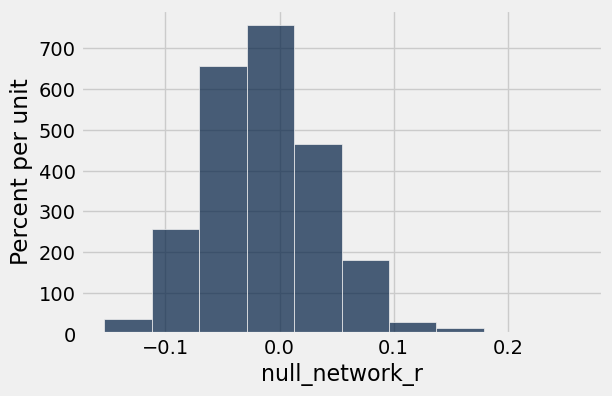

In [25]:
Table().with_column('null_network_r', null_network_r).hist()

# Question 9:

Where is the center of the distribution for our null model?

_The center of the distribution of the null model appears to be right around the 0.00 mark._

# Question 10: 

Now calculate the assortativity coefficient for the observed network (the first Add Health network) that you based the random networks on. Call this `observed_r`.

In [26]:
observed_r = nx.attribute_assortativity_coefficient(first_add_health, "sex")
observed_r

0.1420746545679521

In [27]:
grader.check("q10")

q10 results: All test cases passed!

# Question 11:

Where in the null distribution does the observed value fall? What does this suggest about how likely the observed value is to have been generated from the null model?

_This observed value falls in the right tail of the null distribution, near the maximum values observed from 1000 simulations. This suggests that, although possible, it is unlikely the observed value would be generated from the null model._

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [28]:
grader.check_all()

q1 results: All test cases passed!

q10 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please upload the .zip file to Gradescope.

In [29]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

AttributeError: module 'nbconvert' has no attribute 'pdf'

In [ ]:
grader.export(run_tests=True, filtering=False)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q10 results: All test cases passed!
